# Project Description


Detecting Pediatric Acute Lymphoblastic Leukemia using Computer Vision

https://omdena.com/chapter-challenges/detecting-pediatric-acute-lymphoblastic-leukemia-using-computer-vision/

# Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Required Packages

In [3]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.4 MB/s eta 0:00:00


# Imports

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
  

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import sklearn.metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import optuna




# Load Data - Batch 4


In [5]:
!unzip '/content/drive/MyDrive/omdena_liverpool_all/C-NMC_Leukemia/training_test_pickle/batch_4.zip'

Archive:  /content/drive/MyDrive/omdena_liverpool_all/C-NMC_Leukemia/training_test_pickle/batch_4.zip
 extracting: batch_4/class_labels.txt  
  inflating: batch_4/test_data.pickle  
  inflating: batch_4/train_data.pickle  


In [6]:
df_train = pd.read_pickle('./batch_4/train_data.pickle')
df_test = pd.read_pickle('./batch_4/test_data.pickle')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11917 entries, 0 to 11916
Columns: 4609 entries, 0 to label
dtypes: float32(4608), int32(1)
memory usage: 209.5 MB


In [8]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.185833,0.0,0.00000,0.000000,0.0,0.0,0.0,0.231458,0.0,0.0,...,0.545079,0.170755,0.0,0.096298,0.174819,0.0,0.0,0.361853,0.0,0
1,0.123157,0.0,0.56544,0.350086,0.0,0.0,0.0,0.228849,0.0,0.0,...,0.663390,0.115025,0.0,0.099379,0.516193,0.0,0.0,0.239392,0.0,1
2,0.197977,0.0,0.00000,0.000000,0.0,0.0,0.0,0.155163,0.0,0.0,...,0.663023,0.021846,0.0,0.000000,0.173690,0.0,0.0,0.270634,0.0,1
3,0.580151,0.0,0.00000,0.000000,0.0,0.0,0.0,0.298566,0.0,0.0,...,0.470815,0.000000,0.0,0.000000,0.118325,0.0,0.0,0.000000,0.0,0
4,0.066450,0.0,0.00000,0.000000,0.0,0.0,0.0,0.145156,0.0,0.0,...,0.645798,0.015262,0.0,0.027536,0.275665,0.0,0.0,0.000000,0.0,0


In [9]:
df_train.shape

(11917, 4609)

In [10]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.141500,0.0,0.000000,0.000000,0.0,0.0,0.0,0.151137,0.0,0.0,...,0.885778,0.066009,0.0,0.169458,0.570154,0.0,0.0,0.090579,0.0,0
1,0.047403,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.649062,0.260996,0.0,0.049776,0.494771,0.0,0.0,0.480568,0.0,0
2,0.000000,0.0,0.000000,0.023559,0.0,0.0,0.0,0.060329,0.0,0.0,...,0.725523,0.166289,0.0,0.131945,0.299330,0.0,0.0,0.000000,0.0,0
3,0.002286,0.0,0.655825,0.259398,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.626934,0.244303,0.0,0.100791,0.448022,0.0,0.0,0.295682,0.0,0
4,0.279953,0.0,0.000000,0.000000,0.0,0.0,0.0,0.168589,0.0,0.0,...,0.489483,0.166786,0.0,0.000000,0.212874,0.0,0.0,0.000000,0.0,0


In [11]:
df_test.shape

(1794, 4609)

# Create X and y Data to Feed ML Models

In [31]:
X_train = np.array(df_train.iloc[:,:-1].copy())
y_train = np.array(df_train['label'].copy())

In [32]:
(X_train.shape, y_train.shape)

((11917, 4608), (11917,))

In [33]:
X_test = np.array(df_test.iloc[:,:-1].copy())
y_test = np.array(df_test['label'].copy())

In [34]:
(X_test.shape, y_test.shape)

((1794, 4608), (1794,))

# Feature Selection - ANOVA

REF: https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

In [47]:
# feature selection
def select_features(X_train_, y_train_, X_test_, SelRate = 0.2):
    # configure to select most important
    kSel = int(round(X_train_.shape[1]*SelRate))
    fs = SelectKBest(score_func=f_classif, k=kSel)
    # learn relationship from training data
    fs.fit(X_train_, y_train_)
    # transform train input data
    X_train_fs = fs.transform(X_train_)
    # transform test input data
    X_test_fs = fs.transform(X_test_)
    return X_train_fs, X_test_fs, fs

In [48]:
X_train_fs, X_test_fs, FeatSel = select_features(X_train, y_train, X_test, 0.2)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   5   13   19   25   38   61   64   65   68   74   78   90  107  115
  130  131  140  144  145  167  204  230  252  263  268  278  281  286
  288  295  302  304  310  337  348  351  364  366  373  376  406  420
  421  427  456  460  461  476  484  493  513  517  522  525  531  532
  537  550  552  553  573  576  577  580  586  590  592  602  608  617
  626  642  643  652  656  657  663  679  715  716  732  733  772  780
  782  784  790  798  807  812  814  816  822  849  860  872  876  878
  880  885  888  890  891  911  932  933  939  954  968  972  988  991
  996 1025 1034 1037 1043 1049 1062 1064 1065 1085 1089 1092 1098 1102
 1104 1109 1114 1120 1129 1131 1138 1154 1155 1164 1169 1175 1186 1191
 1208 1213 1227 1228 1231 1244 1245 1284 1292 1296 1302 1305 1310 1312
 1324 1326 1328 1334 1357 1361 1372 1384 1388 1390 1397 1400 1402 1403
 1413 1423 1444 1445 1446 1451 

In [49]:
X_train = X_train_fs.copy()

In [50]:
X_test = X_test_fs.copy()

In [51]:
(X_train.shape, X_test.shape)

((11917, 922), (1794, 922))

# Classification - Logistic Regression

In [52]:
clf_lreg = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
y_pred = clf_lreg.predict(X_test)

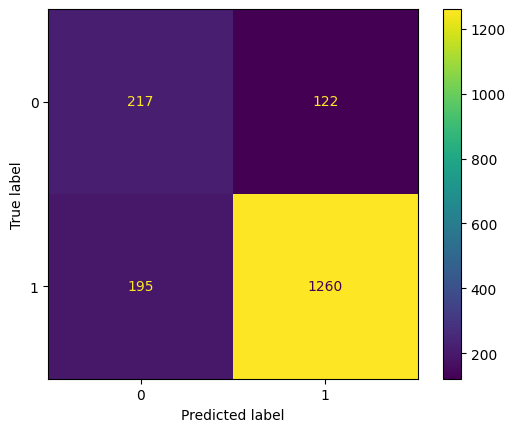

In [53]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [54]:
print(classification_report(y_train, clf_lreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6100
           1       0.86      0.91      0.88      5817

    accuracy                           0.88     11917
   macro avg       0.88      0.88      0.88     11917
weighted avg       0.88      0.88      0.88     11917



In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58       339
           1       0.91      0.87      0.89      1455

    accuracy                           0.82      1794
   macro avg       0.72      0.75      0.73      1794
weighted avg       0.84      0.82      0.83      1794



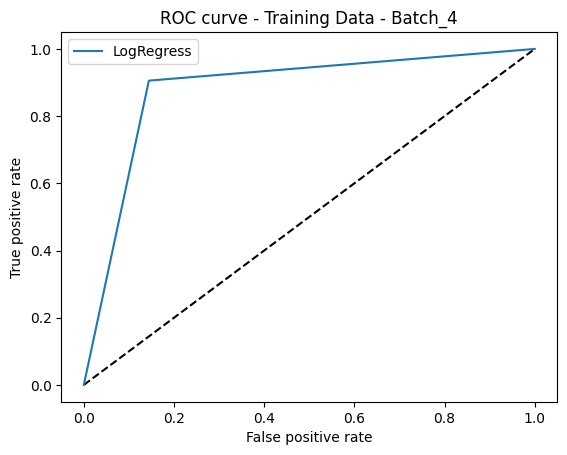

In [56]:
fpr_rf, tpr_rf, _ = roc_curve(y_train, clf_lreg.predict(X_train))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='LogRegress')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Training Data - Batch_4')
plt.legend(loc='best')
plt.show()

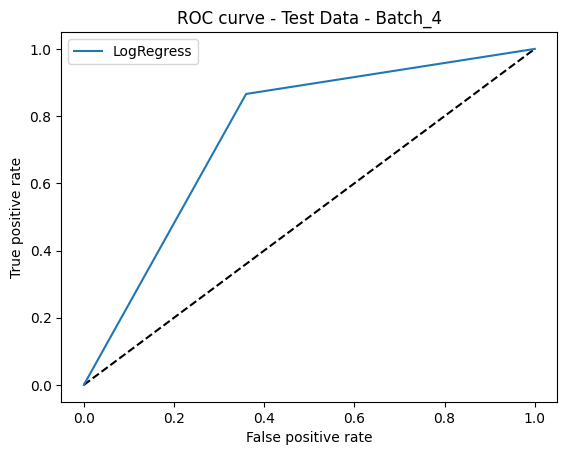

In [57]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_lreg.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='LogRegress')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_4')
plt.legend(loc='best')
plt.show()

# Classification - Random Forest

In [58]:
clf_RF = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [59]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

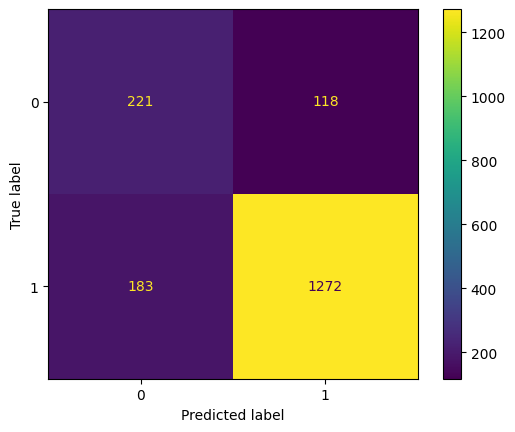

In [60]:
y_pred = clf_RF.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [61]:
print(classification_report(y_train, clf_RF.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6100
           1       1.00      1.00      1.00      5817

    accuracy                           1.00     11917
   macro avg       1.00      1.00      1.00     11917
weighted avg       1.00      1.00      1.00     11917



In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.65      0.59       339
           1       0.92      0.87      0.89      1455

    accuracy                           0.83      1794
   macro avg       0.73      0.76      0.74      1794
weighted avg       0.85      0.83      0.84      1794



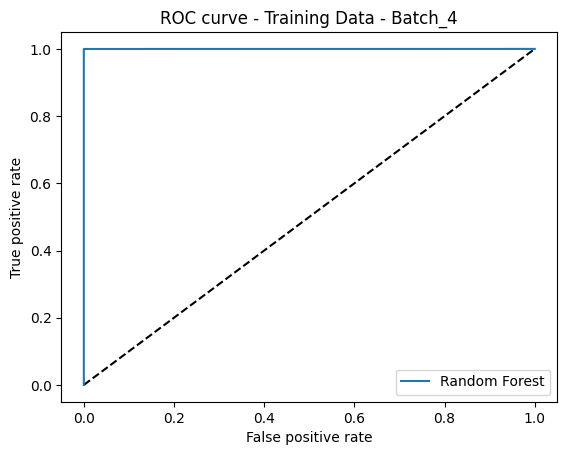

In [63]:
fpr_rf, tpr_rf, _ = roc_curve(y_train, clf_RF.predict(X_train))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Training Data - Batch_4')
plt.legend(loc='best')
plt.show()

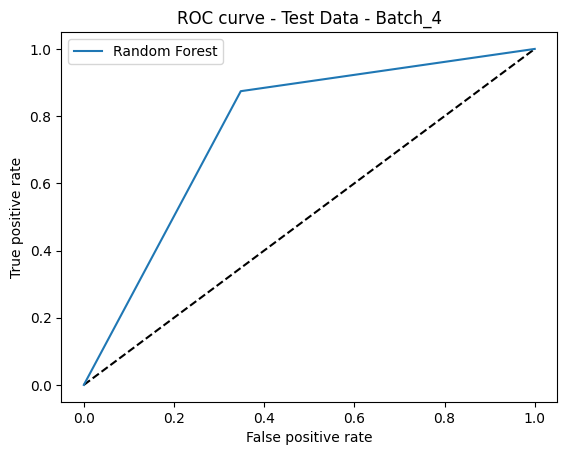

In [64]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_RF.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_4')
plt.legend(loc='best')
plt.show()

# Classification - XGBoost

In [65]:
clf_xgb = XGBClassifier(use_label_encoder=False,eval_metric='logloss',max_depth=50,n_estimators=50,random_state=2023)
clf_xgb.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=2023, ...)

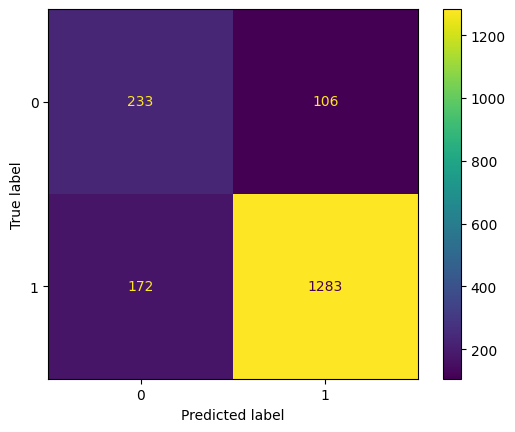

In [66]:
y_pred = clf_xgb.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [67]:
print(classification_report(y_train, clf_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6100
           1       1.00      1.00      1.00      5817

    accuracy                           1.00     11917
   macro avg       1.00      1.00      1.00     11917
weighted avg       1.00      1.00      1.00     11917



In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63       339
           1       0.92      0.88      0.90      1455

    accuracy                           0.85      1794
   macro avg       0.75      0.78      0.76      1794
weighted avg       0.86      0.85      0.85      1794



# Hyperparameter Tuning - Optuna


https://medium.com/optuna/using-optuna-to-optimize-xgboost-hyperparameters-63bfcdfd3407


## Objective Function for Optuna - XGBoost

In [69]:
import xgboost as xgb

In [70]:
def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    param = {
        'n_estimators'      : trial.suggest_int('n_estimators', 50, 500),
        'max_depth'         : trial.suggest_int('max_depth', 50, 500),
        'learning_rate'     : trial.suggest_float('learning_rate', 0.001, 1),
        'verbosity'         : 1,
        'random_state'      : 42,
        'extra_trees'       : True,
        "objective"         : "binary:logistic",
        "eval_metric"       : "auc",
        "booster"           : trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda"            : trial.suggest_float("lambda", 1e-8, 1.0),
        "alpha"             : trial.suggest_float("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0)

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

## Run Optuna

In [71]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=1000)

[I 2023-04-14 01:02:56,908] A new study created in memory with name: no-name-849040de-1f62-4ce4-8f97-9a57dc272fe0


[01:02:57] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73101
[1]	validation-auc:0.75724
[2]	validation-auc:0.78313
[3]	validation-auc:0.80123
[4]	validation-auc:0.81008
[5]	validation-auc:0.81411
[6]	validation-auc:0.81734
[7]	validation-auc:0.82094
[8]	validation-auc:0.82427
[9]	validation-auc:0.82972


[I 2023-04-14 01:03:21,329] Trial 0 finished with value: 0.8054626532887402 and parameters: {'n_estimators': 415, 'max_depth': 415, 'learning_rate': 0.5074979922111239, 'booster': 'gbtree', 'lambda': 0.7481739263158014, 'alpha': 0.804699655416543, 'eta': 0.8864210627714543, 'gamma': 0.812425265111548, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.8054626532887402.


[01:03:21] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72283
[1]	validation-auc:0.75000
[2]	validation-auc:0.76610
[3]	validation-auc:0.77211
[4]	validation-auc:0.77676
[5]	validation-auc:0.78747
[6]	validation-auc:0.79385
[7]	validation-auc:0.80274
[8]	validation-auc:0.80539
[9]	validation-auc:0.81009


[I 2023-04-14 01:03:47,682] Trial 1 finished with value: 0.7971014492753623 and parameters: {'n_estimators': 438, 'max_depth': 452, 'learning_rate': 0.1113698758114355, 'booster': 'gbtree', 'lambda': 0.013465459997700614, 'alpha': 0.257439783952254, 'eta': 0.30106041015536855, 'gamma': 0.15966775266560124, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.8054626532887402.


[01:03:47] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71890
[1]	validation-auc:0.75019
[2]	validation-auc:0.77096
[3]	validation-auc:0.78368
[4]	validation-auc:0.79708
[5]	validation-auc:0.80365
[6]	validation-auc:0.80868
[7]	validation-auc:0.81134
[8]	validation-auc:0.81516
[9]	validation-auc:0.81903


[I 2023-04-14 01:04:10,655] Trial 2 finished with value: 0.8088071348940914 and parameters: {'n_estimators': 309, 'max_depth': 96, 'learning_rate': 0.7521368942086786, 'booster': 'dart', 'lambda': 0.4507782678580792, 'alpha': 0.10101357807238442, 'eta': 0.26043953498013406, 'gamma': 0.8111619826892462, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.17128298848452606, 'skip_drop': 0.9215309283254317}. Best is trial 2 with value: 0.8088071348940914.


[01:04:10] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.55398
[1]	validation-auc:0.55390
[2]	validation-auc:0.55397
[3]	validation-auc:0.55384
[4]	validation-auc:0.56831
[5]	validation-auc:0.56319
[6]	validation-auc:0.56201
[7]	validation-auc:0.56171
[8]	validation-auc:0.56159
[9]	validation-auc:0.56153


[I 2023-04-14 01:04:11,358] Trial 3 finished with value: 0.18896321070234115 and parameters: {'n_estimators': 384, 'max_depth': 152, 'learning_rate': 0.535216493812932, 'booster': 'gblinear', 'lambda': 0.2900617528407218, 'alpha': 0.06844256144386678}. Best is trial 2 with value: 0.8088071348940914.


[01:04:11] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72285
[1]	validation-auc:0.76907
[2]	validation-auc:0.78962
[3]	validation-auc:0.80559
[4]	validation-auc:0.81017
[5]	validation-auc:0.81781
[6]	validation-auc:0.82435
[7]	validation-auc:0.82761
[8]	validation-auc:0.82971
[9]	validation-auc:0.83224


[I 2023-04-14 01:04:33,954] Trial 4 finished with value: 0.8160535117056856 and parameters: {'n_estimators': 267, 'max_depth': 237, 'learning_rate': 0.7464932431294754, 'booster': 'gbtree', 'lambda': 0.599633066670702, 'alpha': 0.06600942552638732, 'eta': 0.6912635082430784, 'gamma': 0.46162083664414666, 'grow_policy': 'depthwise'}. Best is trial 4 with value: 0.8160535117056856.


[01:04:34] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:04:37,085] Trial 5 pruned. Trial was pruned at iteration 0.


[01:04:37] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72923
[1]	validation-auc:0.76006
[2]	validation-auc:0.78657
[3]	validation-auc:0.80584
[4]	validation-auc:0.81751
[5]	validation-auc:0.82180
[6]	validation-auc:0.82751
[7]	validation-auc:0.83487
[8]	validation-auc:0.83855
[9]	validation-auc:0.84157


[I 2023-04-14 01:05:02,942] Trial 6 finished with value: 0.8249721293199554 and parameters: {'n_estimators': 68, 'max_depth': 240, 'learning_rate': 0.445525139136214, 'booster': 'dart', 'lambda': 0.4465528986730449, 'alpha': 0.3711173270286856, 'eta': 0.8916837505590623, 'gamma': 0.9306726378241267, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.007340302100005225, 'skip_drop': 0.04303402363227761}. Best is trial 6 with value: 0.8249721293199554.


[01:05:03] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73114
[1]	validation-auc:0.73114


[I 2023-04-14 01:05:08,631] Trial 7 pruned. Trial was pruned at iteration 1.


[01:05:08] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-14 01:05:08,921] Trial 8 pruned. Trial was pruned at iteration 0.


[01:05:09] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-14 01:05:09,217] Trial 9 pruned. Trial was pruned at iteration 0.


[01:05:09] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73838
[1]	validation-auc:0.76634
[2]	validation-auc:0.78098


[I 2023-04-14 01:05:22,201] Trial 10 pruned. Trial was pruned at iteration 3.


[01:05:22] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72829
[1]	validation-auc:0.76264
[2]	validation-auc:0.77977


[I 2023-04-14 01:05:33,106] Trial 11 pruned. Trial was pruned at iteration 3.


[01:05:33] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72291


[I 2023-04-14 01:05:38,849] Trial 12 pruned. Trial was pruned at iteration 1.


[01:05:39] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73747
[1]	validation-auc:0.75536
[2]	validation-auc:0.78020


[I 2023-04-14 01:05:49,787] Trial 13 pruned. Trial was pruned at iteration 3.


[01:05:50] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72981
[1]	validation-auc:0.72981


[I 2023-04-14 01:05:57,806] Trial 14 pruned. Trial was pruned at iteration 1.


[01:05:58] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73632
[1]	validation-auc:0.77560
[2]	validation-auc:0.78662
[3]	validation-auc:0.79656
[4]	validation-auc:0.80556
[5]	validation-auc:0.81421
[6]	validation-auc:0.81604
[7]	validation-auc:0.82149
[8]	validation-auc:0.82645
[9]	validation-auc:0.82642


[I 2023-04-14 01:06:19,482] Trial 15 finished with value: 0.8138238573021181 and parameters: {'n_estimators': 224, 'max_depth': 168, 'learning_rate': 0.6841273410941578, 'booster': 'gbtree', 'lambda': 0.9841762414347084, 'alpha': 0.6235775139576298, 'eta': 0.5823098363394517, 'gamma': 0.3696250481814731, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.8249721293199554.


[01:06:19] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:06:25,410] Trial 16 pruned. Trial was pruned at iteration 0.


[01:06:25] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:06:29,060] Trial 17 pruned. Trial was pruned at iteration 0.


[01:06:29] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73804
[1]	validation-auc:0.76325


[I 2023-04-14 01:06:39,699] Trial 18 pruned. Trial was pruned at iteration 2.
[I 2023-04-14 01:06:40,081] Trial 19 pruned. Trial was pruned at iteration 0.


[01:06:39] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[01:06:40] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:06:43,802] Trial 20 pruned. Trial was pruned at iteration 0.


[01:06:43] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73634
[1]	validation-auc:0.77749
[2]	validation-auc:0.78760
[3]	validation-auc:0.80134
[4]	validation-auc:0.80790
[5]	validation-auc:0.81443
[6]	validation-auc:0.82028
[7]	validation-auc:0.82286
[8]	validation-auc:0.82486


[I 2023-04-14 01:07:07,618] Trial 21 pruned. Trial was pruned at iteration 9.


[01:07:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73612
[1]	validation-auc:0.76640


[I 2023-04-14 01:07:15,341] Trial 22 pruned. Trial was pruned at iteration 2.


[01:07:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73475
[1]	validation-auc:0.76641


[I 2023-04-14 01:07:25,031] Trial 23 pruned. Trial was pruned at iteration 2.


[01:07:25] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72889
[1]	validation-auc:0.77056
[2]	validation-auc:0.79448
[3]	validation-auc:0.80307
[4]	validation-auc:0.81458
[5]	validation-auc:0.82349
[6]	validation-auc:0.82645
[7]	validation-auc:0.82776
[8]	validation-auc:0.83051
[9]	validation-auc:0.83437


[I 2023-04-14 01:07:47,122] Trial 24 finished with value: 0.8082497212931996 and parameters: {'n_estimators': 233, 'max_depth': 213, 'learning_rate': 0.6334158430728625, 'booster': 'gbtree', 'lambda': 0.8407947858621206, 'alpha': 0.1331404797732557, 'eta': 0.8141616072160679, 'gamma': 0.5807526933002853, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.8249721293199554.


[01:07:47] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73153


[I 2023-04-14 01:07:54,043] Trial 25 pruned. Trial was pruned at iteration 1.


[01:07:54] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71953


[I 2023-04-14 01:07:57,680] Trial 26 pruned. Trial was pruned at iteration 0.


[01:07:57] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73426


[I 2023-04-14 01:08:05,642] Trial 27 pruned. Trial was pruned at iteration 1.


[01:08:05] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73188
[1]	validation-auc:0.76357
[2]	validation-auc:0.78776
[3]	validation-auc:0.79778


[I 2023-04-14 01:08:15,703] Trial 28 pruned. Trial was pruned at iteration 3.


[01:08:16] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-14 01:08:16,395] Trial 29 pruned. Trial was pruned at iteration 0.


[01:08:16] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73200
[1]	validation-auc:0.74578


[I 2023-04-14 01:08:23,187] Trial 30 pruned. Trial was pruned at iteration 1.


[01:08:23] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:08:26,985] Trial 31 pruned. Trial was pruned at iteration 0.


[01:08:27] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:08:32,580] Trial 32 pruned. Trial was pruned at iteration 0.


[01:08:32] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71141


[I 2023-04-14 01:08:36,376] Trial 33 pruned. Trial was pruned at iteration 0.


[01:08:36] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73038


[I 2023-04-14 01:08:42,138] Trial 34 pruned. Trial was pruned at iteration 1.


[01:08:42] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72252


[I 2023-04-14 01:08:48,193] Trial 35 pruned. Trial was pruned at iteration 0.


[01:08:48] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73066
[1]	validation-auc:0.76861
[2]	validation-auc:0.79123


[I 2023-04-14 01:08:59,875] Trial 36 pruned. Trial was pruned at iteration 3.


[01:09:00] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-14 01:09:00,322] Trial 37 pruned. Trial was pruned at iteration 0.


[01:09:00] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73222
[1]	validation-auc:0.75973
[2]	validation-auc:0.78548


[I 2023-04-14 01:09:08,983] Trial 38 pruned. Trial was pruned at iteration 3.


[01:09:09] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72373


[I 2023-04-14 01:09:15,057] Trial 39 pruned. Trial was pruned at iteration 0.


[01:09:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-14 01:09:15,365] Trial 40 pruned. Trial was pruned at iteration 0.


[01:09:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72889
[1]	validation-auc:0.76980
[2]	validation-auc:0.79448
[3]	validation-auc:0.80467
[4]	validation-auc:0.81481
[5]	validation-auc:0.81947
[6]	validation-auc:0.82459
[7]	validation-auc:0.82777
[8]	validation-auc:0.82923
[9]	validation-auc:0.83051


[I 2023-04-14 01:09:36,856] Trial 41 finished with value: 0.8110367892976589 and parameters: {'n_estimators': 223, 'max_depth': 213, 'learning_rate': 0.6360293069714709, 'booster': 'gbtree', 'lambda': 0.8308332690571936, 'alpha': 0.13919432877447463, 'eta': 0.7901163728014593, 'gamma': 0.5650007088257434, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.8249721293199554.


[01:09:37] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72555


[I 2023-04-14 01:09:42,750] Trial 42 pruned. Trial was pruned at iteration 0.


[01:09:42] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73029
[1]	validation-auc:0.76257


[I 2023-04-14 01:09:50,605] Trial 43 pruned. Trial was pruned at iteration 2.


[01:09:50] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:09:56,086] Trial 44 pruned. Trial was pruned at iteration 0.


[01:09:56] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72891
[1]	validation-auc:0.76422
[2]	validation-auc:0.79091
[3]	validation-auc:0.80580
[4]	validation-auc:0.81278
[5]	validation-auc:0.81749
[6]	validation-auc:0.82286
[7]	validation-auc:0.82935
[8]	validation-auc:0.83196
[9]	validation-auc:0.83727


[I 2023-04-14 01:10:17,603] Trial 45 finished with value: 0.8082497212931996 and parameters: {'n_estimators': 220, 'max_depth': 232, 'learning_rate': 0.5598476847162459, 'booster': 'gbtree', 'lambda': 0.9873452669819487, 'alpha': 0.05855552427164801, 'eta': 0.9134708793693824, 'gamma': 0.38469129656854884, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.8249721293199554.


[01:10:17] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72963
[1]	validation-auc:0.76281
[2]	validation-auc:0.78704
[3]	validation-auc:0.79999


[I 2023-04-14 01:10:28,775] Trial 46 pruned. Trial was pruned at iteration 3.


[01:10:28] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72318


[I 2023-04-14 01:10:32,502] Trial 47 pruned. Trial was pruned at iteration 0.


[01:10:32] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73067
[1]	validation-auc:0.75031


[I 2023-04-14 01:10:40,423] Trial 48 pruned. Trial was pruned at iteration 1.


[01:10:40] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73200


[I 2023-04-14 01:10:46,321] Trial 49 pruned. Trial was pruned at iteration 1.


[01:10:46] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72990


[I 2023-04-14 01:10:54,430] Trial 50 pruned. Trial was pruned at iteration 1.


[01:10:54] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73137
[1]	validation-auc:0.76879
[2]	validation-auc:0.78820


[I 2023-04-14 01:11:06,184] Trial 51 pruned. Trial was pruned at iteration 3.


[01:11:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72995
[1]	validation-auc:0.76770
[2]	validation-auc:0.79077
[3]	validation-auc:0.80414
[4]	validation-auc:0.81128
[5]	validation-auc:0.81672
[6]	validation-auc:0.82148
[7]	validation-auc:0.82587
[8]	validation-auc:0.83032
[9]	validation-auc:0.83382


[I 2023-04-14 01:11:26,117] Trial 52 finished with value: 0.8032329988851727 and parameters: {'n_estimators': 228, 'max_depth': 197, 'learning_rate': 0.7133789482513093, 'booster': 'gbtree', 'lambda': 0.849500617973276, 'alpha': 0.14888464830965348, 'eta': 0.8252556869999075, 'gamma': 0.582865645931352, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.8249721293199554.


[01:11:26] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72530


[I 2023-04-14 01:11:29,859] Trial 53 pruned. Trial was pruned at iteration 0.


[01:11:30] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73703
[1]	validation-auc:0.77010
[2]	validation-auc:0.79086
[3]	validation-auc:0.80486
[4]	validation-auc:0.81619
[5]	validation-auc:0.81871
[6]	validation-auc:0.82370
[7]	validation-auc:0.82549


[I 2023-04-14 01:11:50,724] Trial 54 pruned. Trial was pruned at iteration 7.


[01:11:50] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73173
[1]	validation-auc:0.77110


[I 2023-04-14 01:11:58,379] Trial 55 pruned. Trial was pruned at iteration 2.


[01:11:58] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-14 01:11:59,105] Trial 56 pruned. Trial was pruned at iteration 0.


[01:11:59] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73141
[1]	validation-auc:0.76527
[2]	validation-auc:0.79298
[3]	validation-auc:0.80603
[4]	validation-auc:0.81545
[5]	validation-auc:0.82222
[6]	validation-auc:0.82847
[7]	validation-auc:0.82902
[8]	validation-auc:0.83493
[9]	validation-auc:0.83556


[I 2023-04-14 01:12:21,332] Trial 57 finished with value: 0.8149386845039019 and parameters: {'n_estimators': 331, 'max_depth': 154, 'learning_rate': 0.5988520766039489, 'booster': 'gbtree', 'lambda': 0.5092842433878196, 'alpha': 0.3100886991871075, 'eta': 0.8504634106315565, 'gamma': 0.7228113470234646, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.8249721293199554.


[01:12:21] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73118
[1]	validation-auc:0.75988


[I 2023-04-14 01:12:27,629] Trial 58 pruned. Trial was pruned at iteration 1.


[01:12:27] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72951


[I 2023-04-14 01:12:34,513] Trial 59 pruned. Trial was pruned at iteration 1.


[01:12:34] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73622
[1]	validation-auc:0.77204
[2]	validation-auc:0.79020
[3]	validation-auc:0.79613


[I 2023-04-14 01:12:46,633] Trial 60 pruned. Trial was pruned at iteration 3.


[01:12:46] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71771


[I 2023-04-14 01:12:50,217] Trial 61 pruned. Trial was pruned at iteration 0.


[01:12:50] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73330
[1]	validation-auc:0.76340


[I 2023-04-14 01:12:56,315] Trial 62 pruned. Trial was pruned at iteration 1.


[01:12:56] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72989
[1]	validation-auc:0.77545
[2]	validation-auc:0.78998


[I 2023-04-14 01:13:06,751] Trial 63 pruned. Trial was pruned at iteration 3.


[01:13:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73121


[I 2023-04-14 01:13:14,772] Trial 64 pruned. Trial was pruned at iteration 1.


[01:13:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73145


[I 2023-04-14 01:13:20,461] Trial 65 pruned. Trial was pruned at iteration 1.


[01:13:20] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:13:24,690] Trial 66 pruned. Trial was pruned at iteration 0.


[01:13:25] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71854


[I 2023-04-14 01:13:29,800] Trial 67 pruned. Trial was pruned at iteration 0.


[01:13:30] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-14 01:13:30,140] Trial 68 pruned. Trial was pruned at iteration 0.


[01:13:30] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73671


[I 2023-04-14 01:13:36,172] Trial 69 pruned. Trial was pruned at iteration 1.


[01:13:36] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:13:42,088] Trial 70 pruned. Trial was pruned at iteration 0.


[01:13:42] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72928
[1]	validation-auc:0.76488


[I 2023-04-14 01:13:50,168] Trial 71 pruned. Trial was pruned at iteration 2.


[01:13:50] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73043
[1]	validation-auc:0.77321
[2]	validation-auc:0.79155
[3]	validation-auc:0.80633
[4]	validation-auc:0.81751
[5]	validation-auc:0.82471
[6]	validation-auc:0.82660
[7]	validation-auc:0.82871
[8]	validation-auc:0.83165
[9]	validation-auc:0.83416


[I 2023-04-14 01:14:14,086] Trial 72 finished with value: 0.8160535117056856 and parameters: {'n_estimators': 224, 'max_depth': 239, 'learning_rate': 0.5912932800743779, 'booster': 'gbtree', 'lambda': 0.9599790938320907, 'alpha': 0.043638849694438535, 'eta': 0.8985711595251064, 'gamma': 0.3952848384834284, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.8249721293199554.


[01:14:14] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73192
[1]	validation-auc:0.76634
[2]	validation-auc:0.78310


[I 2023-04-14 01:14:24,392] Trial 73 pruned. Trial was pruned at iteration 2.


[01:14:24] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73284
[1]	validation-auc:0.76622
[2]	validation-auc:0.78330


[I 2023-04-14 01:14:31,890] Trial 74 pruned. Trial was pruned at iteration 2.


[01:14:32] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:14:37,774] Trial 75 pruned. Trial was pruned at iteration 0.


[01:14:37] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72941
[1]	validation-auc:0.76613


[I 2023-04-14 01:14:46,237] Trial 76 pruned. Trial was pruned at iteration 2.


[01:14:46] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73138


[I 2023-04-14 01:14:54,487] Trial 77 pruned. Trial was pruned at iteration 1.


[01:14:54] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72947
[1]	validation-auc:0.76852
[2]	validation-auc:0.78555


[I 2023-04-14 01:15:02,028] Trial 78 pruned. Trial was pruned at iteration 2.


[01:15:02] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72768


[I 2023-04-14 01:15:07,674] Trial 79 pruned. Trial was pruned at iteration 0.


[01:15:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-14 01:15:08,004] Trial 80 pruned. Trial was pruned at iteration 0.


[01:15:08] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72926
[1]	validation-auc:0.76690
[2]	validation-auc:0.79555
[3]	validation-auc:0.80526
[4]	validation-auc:0.81725
[5]	validation-auc:0.82350
[6]	validation-auc:0.82593
[7]	validation-auc:0.82896
[8]	validation-auc:0.83399
[9]	validation-auc:0.83643


[I 2023-04-14 01:15:29,325] Trial 81 finished with value: 0.81438127090301 and parameters: {'n_estimators': 225, 'max_depth': 227, 'learning_rate': 0.5729348803490291, 'booster': 'gbtree', 'lambda': 0.9981260957202077, 'alpha': 0.0628248886053768, 'eta': 0.9063307124920588, 'gamma': 0.3986973318222705, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.8249721293199554.


[01:15:29] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72894


[I 2023-04-14 01:15:34,722] Trial 82 pruned. Trial was pruned at iteration 0.


[01:15:34] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72989
[1]	validation-auc:0.76190


[I 2023-04-14 01:15:40,888] Trial 83 pruned. Trial was pruned at iteration 1.


[01:15:41] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73043
[1]	validation-auc:0.77105
[2]	validation-auc:0.77699


[I 2023-04-14 01:15:51,254] Trial 84 pruned. Trial was pruned at iteration 2.


[01:15:51] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73298
[1]	validation-auc:0.77006
[2]	validation-auc:0.79022
[3]	validation-auc:0.80594
[4]	validation-auc:0.81786
[5]	validation-auc:0.82100
[6]	validation-auc:0.82453
[7]	validation-auc:0.83003
[8]	validation-auc:0.83387
[9]	validation-auc:0.83622


[I 2023-04-14 01:16:12,414] Trial 85 finished with value: 0.8238573021181717 and parameters: {'n_estimators': 315, 'max_depth': 240, 'learning_rate': 0.6693903530097097, 'booster': 'gbtree', 'lambda': 0.8385542569910625, 'alpha': 0.032138352881994736, 'eta': 0.8442104245956105, 'gamma': 0.35989610080056444, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.8249721293199554.


[01:16:12] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72786


[I 2023-04-14 01:16:17,926] Trial 86 pruned. Trial was pruned at iteration 0.


[01:16:18] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72935
[1]	validation-auc:0.76049


[I 2023-04-14 01:16:24,009] Trial 87 pruned. Trial was pruned at iteration 1.


[01:16:24] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72896


[I 2023-04-14 01:16:28,553] Trial 88 pruned. Trial was pruned at iteration 0.


[01:16:28] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73143
[1]	validation-auc:0.76787


[I 2023-04-14 01:16:37,233] Trial 89 pruned. Trial was pruned at iteration 2.


[01:16:37] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72588


[I 2023-04-14 01:16:40,964] Trial 90 pruned. Trial was pruned at iteration 0.


[01:16:41] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72991
[1]	validation-auc:0.76556


[I 2023-04-14 01:16:48,632] Trial 91 pruned. Trial was pruned at iteration 1.


[01:16:48] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:16:52,397] Trial 92 pruned. Trial was pruned at iteration 0.


[01:16:52] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73099
[1]	validation-auc:0.76662


[I 2023-04-14 01:17:00,109] Trial 93 pruned. Trial was pruned at iteration 1.


[01:17:00] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:17:03,860] Trial 94 pruned. Trial was pruned at iteration 0.


[01:17:04] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:17:07,203] Trial 95 pruned. Trial was pruned at iteration 0.


[01:17:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-14 01:17:13,016] Trial 96 pruned. Trial was pruned at iteration 0.


[01:17:13] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72925
[1]	validation-auc:0.76843


[I 2023-04-14 01:17:21,155] Trial 97 pruned. Trial was pruned at iteration 2.


[01:17:21] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73462
[1]	validation-auc:0.77270


[I 2023-04-14 01:17:30,709] Trial 98 pruned. Trial was pruned at iteration 2.


[01:17:30] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73271
[1]	validation-auc:0.75539


[I 2023-04-14 01:17:36,595] Trial 99 pruned. Trial was pruned at iteration 1.


## Best XGBoost Model from Optuna

In [72]:
study.best_params

{'n_estimators': 68,
 'max_depth': 240,
 'learning_rate': 0.445525139136214,
 'booster': 'dart',
 'lambda': 0.4465528986730449,
 'alpha': 0.3711173270286856,
 'eta': 0.8916837505590623,
 'gamma': 0.9306726378241267,
 'grow_policy': 'depthwise',
 'sample_type': 'uniform',
 'normalize_type': 'tree',
 'rate_drop': 0.007340302100005225,
 'skip_drop': 0.04303402363227761}

In [73]:
clf_xgb_opt= XGBClassifier(**study.best_params)

In [74]:
clf_xgb_opt.fit(X_train, y_train)

XGBClassifier(alpha=0.3711173270286856, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.8916837505590623,
              eval_metric=None, feature_types=None, gamma=0.9306726378241267,
              gpu_id=None, grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, lambda=0.4465528986730449,
              learning_rate=0.445525139136214, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=240, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=68, n_jobs=None, ...)

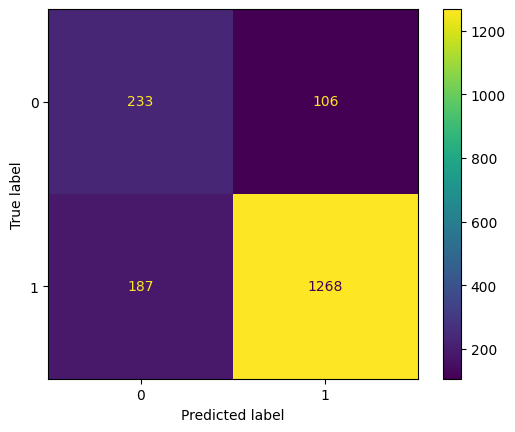

In [75]:
y_pred = clf_xgb_opt.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [76]:
print(classification_report(y_train, clf_xgb_opt.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6100
           1       1.00      1.00      1.00      5817

    accuracy                           1.00     11917
   macro avg       1.00      1.00      1.00     11917
weighted avg       1.00      1.00      1.00     11917



In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.69      0.61       339
           1       0.92      0.87      0.90      1455

    accuracy                           0.84      1794
   macro avg       0.74      0.78      0.76      1794
weighted avg       0.85      0.84      0.84      1794



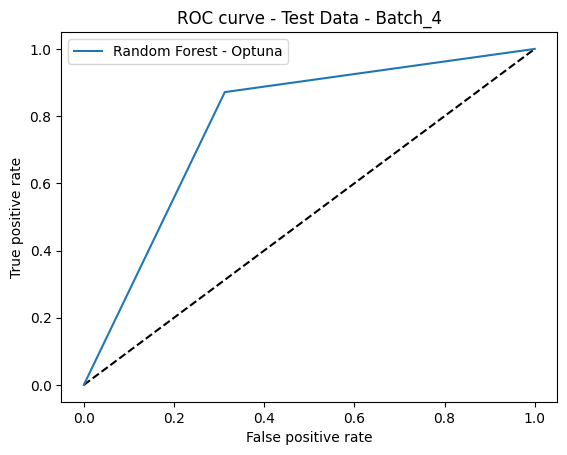

In [78]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_xgb_opt.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest - Optuna')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_4')
plt.legend(loc='best')
plt.show()